# ERDDAP Status page metrics

The erddap-python library can parse status.html page of ERDDAP Servers. The data is collected in DataFrame and scalars, so a administrator can collect, review this metrics.

In this demo we collect data from this URL: https://coastwatch.pfeg.noaa.gov/erddap


In [3]:
from erddapClient import ERDDAP_Server

# Connect to a ERDDAP Server
erddapurl = 'https://coastwatch.pfeg.noaa.gov/erddap'
remote = ERDDAP_Server(erddapurl)

In [4]:
from pprint import pprint

# show all the data available metrics in statusValues
for k in remote.statusValues.keys():
    print (k)

current-time
startup-time
ngriddatasets
ntabledatasets
ntotaldatasets
ndatasetsfailed2load_sincelast_mld
datasetsfailed2load_sincelast_mld
nresponsefailed_since_lastmld
nresponsefailed_time_since_lastmld
nresponsefailed_since_lastdr
nresponsefailed_time_since_lastdr
nresponsefailed_since_startup
nresponsefailed_time_since_startup
nresponsesucceeded_since_lastmld
responsesucceeded_time_since_lastmld
nresponsesucceeded_since_lastdr
responsesucceeded_time_since_lastdr
nresponsesucceeded_since_startup
responsesucceeded_time_since_startup
ntaskthreadfailed_since_lastdr
taskthreadfailed_time_since_lastdr
ntaskthreadfailed_since_startup
taskthreadfailed_time_since_startup
ntaskthreadsucceeded_since_lastdr
taskthreadsucceeded_time_since_lastdr
ntaskthreadsucceeded_since_startup
taskthreadsucceeded_time_since_startup
nthreads_tomwait
nthreads_inotify
nthreads_other
memoryinuse
highwatermark
xmx
major_loaddatasets_timeseries
n_major_loaddatasets_timedistribution_since_lastdr
nmedian_major_loadda

In [5]:
print ("Total datasets -")
print ("Total griddap datasets  : {} ".format(remote.statusValues['ngriddatasets']))
print ("Total tabledap datasets : {} ".format(remote.statusValues['ntabledatasets']))

Total datasets -
Total griddap datasets  : 1368 
Total tabledap datasets : 353 


In [6]:
print ("Memory usage (MB) -")
print ("Memory in use          : {:,} ".format(remote.statusValues['memoryinuse']))
print ("Memory high water mark : {:,} ".format(remote.statusValues['highwatermark']))
print ("Memory XMX             : {:,} ".format(remote.statusValues['xmx']))

Memory usage (MB) -
Memory in use          : 2,304 
Memory high water mark : 10,177 
Memory XMX             : 11,500 


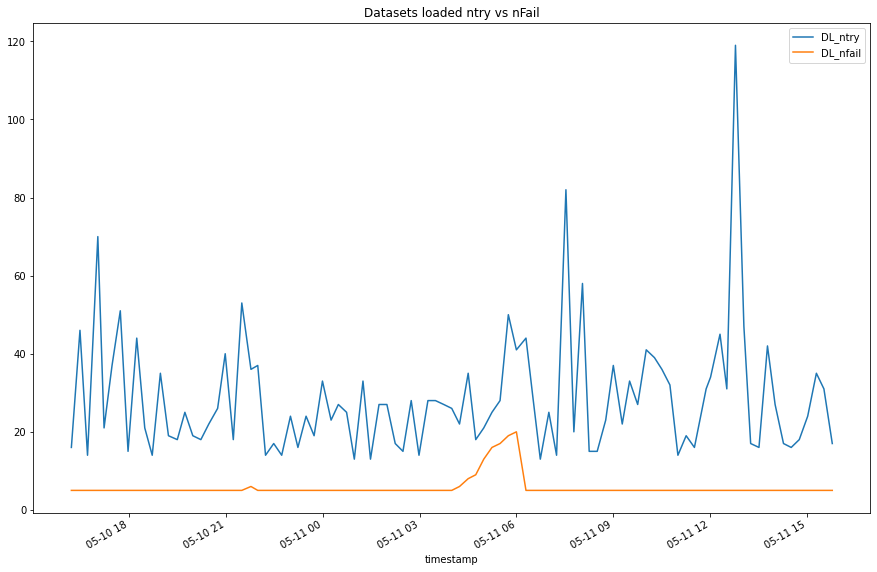

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# The Major load datasets events timeseries table is collected in 'major_loaddatasets_timeseries'
# In this plot we show the datasets that erddap tried to load, and how many of those failed. 
# This data is in the columns DL_ntry and DL_nfail.

remote.statusValues['major_loaddatasets_timeseries'].DL_ntry.plot(title='Datasets loaded ntry vs nFail')
remote.statusValues['major_loaddatasets_timeseries'].DL_nfail.plot()
plt.legend()

#ax = remote.statusValues['major_loaddatasets_timeseries'].mld_time.plot(secondary_y=True, marker='o')
#ax.set_ylabel('seconds')
#plt.legend()

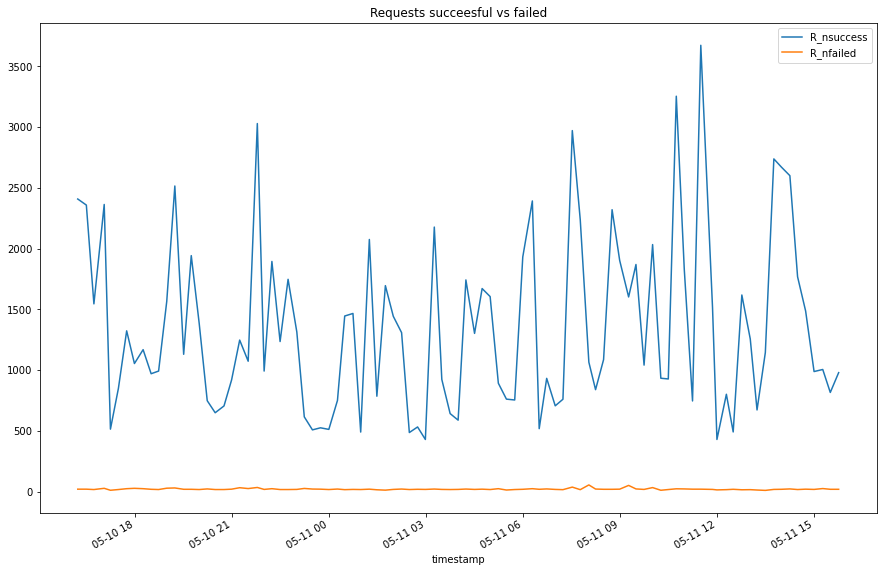

In [9]:
# Show the succeeded vs failed data requests
#

remote.statusValues['major_loaddatasets_timeseries'].R_nsuccess.plot(title='Requests succeesful vs failed')
remote.statusValues['major_loaddatasets_timeseries'].R_nfailed.plot()
plt.legend()

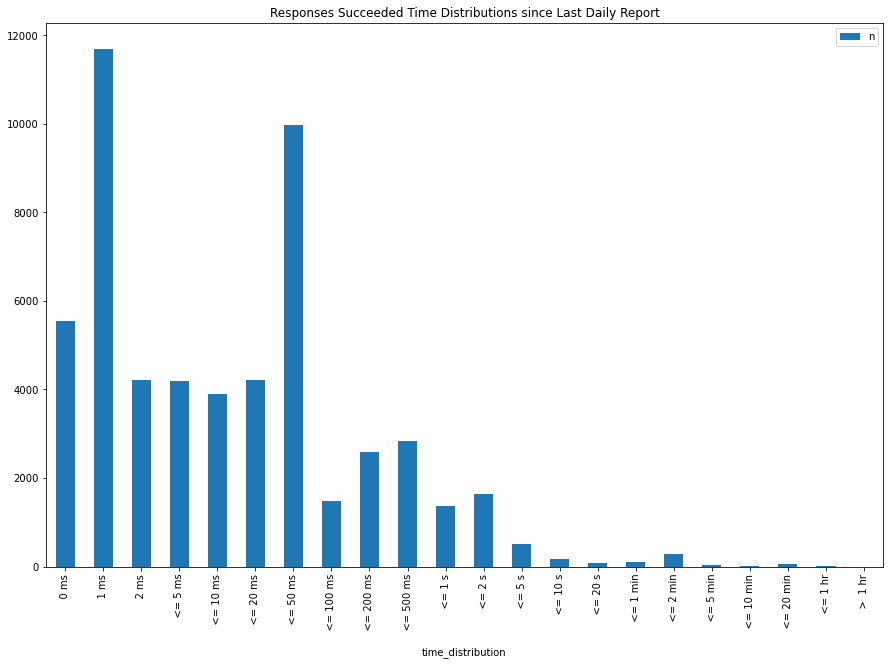

In [10]:
# Time distributions

td_df = remote.statusValues['response_succeeded_timedistribution_since_lastdr']
td_df.plot(x='time_distribution',
           y='n', 
           kind='bar', 
           title='Responses Succeeded Time Distributions since Last Daily Report')

In [10]:
remote.statusValues['major_loaddatasets_timedistribution_since_lastdr']

,time_distribution,n
0,0 ms,0
1,1 ms,0
2,2 ms,0
3,<= 5 ms,0
4,<= 10 ms,0
5,<= 20 ms,0
6,<= 50 ms,0
7,<= 100 ms,0
8,<= 200 ms,0
9,<= 500 ms,0
